In [ ]:
import pandas as pd                                                #importing libraries
import numpy as np                                                 #Dataset: SampleDS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

le = LabelEncoder()
ms= MinMaxScaler()

In [ ]:
df= pd.read_csv("/content/SampleDS.csv")
df        #We have rows: 910  columns: 10

,Salesperson,Product,Region,Customer,Date,Item Cost,No.Items,revenue,Years_Of_Shopping,CustomerLifetimeValue
0,"Sharma, Varun",Glass Centre Table,North East,Metro Emporium,19-Jul-22,65.91,4.0,21969.0,1.75,38445.75
1,"Sharma, Varun",Wodden Coffee Table,North East,Elite Designs,20-Nov-21,114.37,4.0,38121.0,2.42,92252.82
2,"Sharma, Varun",Marble Dining Table,North East,Home INDIA,14-Jan-21,440.58,4.0,146854.0,3.25,477275.50
3,"Sharma, Varun",7 Seater Sofa & Recliner,North East,Metro Emporium,28-Mar-22,48.37,4.0,16122.0,2.09,33694.98
4,"Sharma, Varun",7 Seater Sofa & Recliner,North East,Home INDIA,16-Aug-22,357.73,3.0,89428.0,1.67,149344.76
...,...,...,...,...,...,...,...,...,...,...
905,"Kale, Shipra",Bamboo Foam Couch,South East,Style and Spa,27-May-22,817.11,22.0,1497975.0,1.92,2876112.00
906,"Kale, Shipra",Marble Dining Table,South East,Metro Emporium,18-Jan-22,313.55,11.0,287409.0,2.25,646670.25
907,"Kale, Shipra",Marble Dining Table,South East,Home INDIA,06-Jan-21,503.03,2.0,83834.0,3.25,272460.50
908,"Kale, Shipra",Marble Dining Table,South East,Home INDIA,11-Jan-21,200.82,6.0,100405.0,3.25,326316.25


In [ ]:
df.isnull().sum()

Salesperson              1
Product                  1
Region                   1
Customer                 1
Date                     1
Item Cost                1
No.Items                 1
revenue                  1
Years_Of_Shopping        0
CustomerLifetimeValue    1
dtype: int64

In [ ]:
df=df[:-1]        #dealing with null values
print(df.isnull().sum())

Salesperson              0
Product                  0
Region                   0
Customer                 0
Date                     0
Item Cost                0
No.Items                 0
revenue                  0
Years_Of_Shopping        0
CustomerLifetimeValue    0
dtype: int64


In [ ]:
df['Salesperson'] = le.fit_transform(df['Salesperson'])    #ENCODING DATASET
df['Product'] = le.fit_transform(df['Product'])
df['Region'] = le.fit_transform(df['Region'])
df['Customer'] = le.fit_transform(df['Customer'])
df['Date'] = le.fit_transform(df['Date'])

<ipython-input-5-18077b4ba6ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salesperson'] = le.fit_transform(df['Salesperson'])    #ENCODING DATASET
<ipython-input-5-18077b4ba6ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product'] = le.fit_transform(df['Product'])
<ipython-input-5-18077b4ba6ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
df    #dataset after encoding

,Salesperson,Product,Region,Customer,Date,Item Cost,No.Items,revenue,Years_Of_Shopping,CustomerLifetimeValue
0,10,2,0,3,263,65.91,4.0,21969.0,1.75,38445.75
1,10,4,0,1,282,114.37,4.0,38121.0,2.42,92252.82
2,10,3,0,2,189,440.58,4.0,146854.0,3.25,477275.50
3,10,0,0,3,404,48.37,4.0,16122.0,2.09,33694.98
4,10,0,0,2,217,357.73,3.0,89428.0,1.67,149344.76
...,...,...,...,...,...,...,...,...,...,...
904,5,4,2,3,202,230.84,6.0,115415.0,1.34,154656.10
905,5,1,2,4,391,817.11,22.0,1497975.0,1.92,2876112.00
906,5,3,2,3,246,313.55,11.0,287409.0,2.25,646670.25
907,5,3,2,2,80,503.03,2.0,83834.0,3.25,272460.50


In [ ]:
df.duplicated()   #No duplicated values

0      False
1      False
2      False
3      False
4      False
       ...  
904    False
905    False
906    False
907    False
908    False
Length: 909, dtype: bool

In [ ]:
df.corr()

,Salesperson,Product,Region,Customer,Date,Item Cost,No.Items,revenue,Years_Of_Shopping,CustomerLifetimeValue
Salesperson,1.000000,-0.013682,-0.225634,0.020726,0.040042,0.012290,0.025161,-0.006396,-0.014196,-0.005618
Product,-0.013682,1.000000,-0.003429,-0.019642,-0.005685,-0.307328,0.009849,-0.232682,-0.070475,-0.233901
Region,-0.225634,-0.003429,1.000000,-0.052833,-0.023349,0.007248,0.011673,0.032087,-0.049910,0.023114
Customer,0.020726,-0.019642,-0.052833,1.000000,-0.000135,0.021828,0.330364,0.171044,0.072383,0.175283
Date,0.040042,-0.005685,-0.023349,-0.000135,1.000000,0.067806,0.029713,0.067694,0.056925,0.070379
Item Cost,0.012290,-0.307328,0.007248,0.021828,0.067806,1.000000,0.035755,0.765289,0.039415,0.738165
No.Items,0.025161,0.009849,0.011673,0.330364,0.029713,0.035755,1.000000,0.477575,0.018191,0.450770
revenue,-0.006396,-0.232682,0.032087,0.171044,0.067694,0.765289,0.477575,1.000000,0.003351,0.951316
Years_Of_Shopping,-0.014196,-0.070475,-0.049910,0.072383,0.056925,0.039415,0.018191,0.003351,1.000000,0.188784
CustomerLifetimeValue,-0.005618,-0.233901,0.023114,0.175283,0.070379,0.738165,0.450770,0.951316,0.188784,1.000000


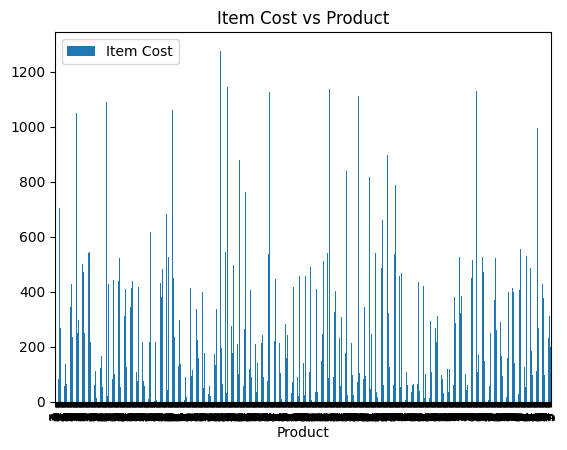

In [ ]:

df.plot(x='Product', y='Item Cost', kind='bar')
plt.title("Item Cost vs Product")
plt.show()


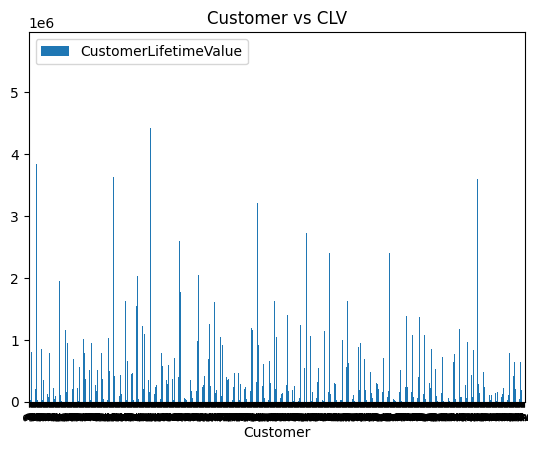

In [ ]:
df.plot(x='Customer', y='CustomerLifetimeValue', kind='bar')
plt.title("Customer vs CLV")
plt.show()


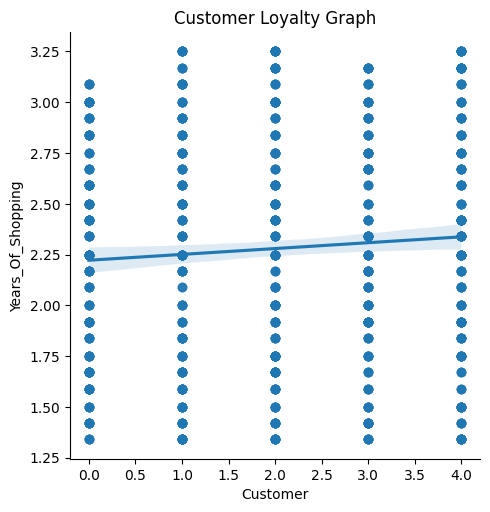

In [ ]:
# prompt: generate  graph between two columns

import matplotlib.pyplot as plt
sns.lmplot(x="Customer", y="Years_Of_Shopping", data=df)
plt.title('Customer Loyalty Graph')
plt.show()


In [ ]:
df.cov()

,Salesperson,Product,Region,Customer,Date,Item Cost,No.Items,revenue,Years_Of_Shopping,CustomerLifetimeValue
Salesperson,11.253968,-0.064041,-0.948727,0.098290,1.695364e+01,1.117295e+01,4.581474e-01,-5.986345e+03,-0.026793,-1.250784e+04
Product,-0.064041,1.946776,-0.005996,-0.038743,-1.001052e+00,-1.162024e+02,7.459303e-02,-9.058382e+04,-0.055324,-2.165998e+05
Region,-0.948727,-0.005996,1.570974,-0.093612,-3.693588e+00,2.461933e+00,7.941752e-02,1.122147e+04,-0.035196,1.922788e+04
Customer,0.098290,-0.038743,-0.093612,1.998430,-2.407642e-02,8.361976e+00,2.534948e+00,6.746555e+04,0.057571,1.644571e+05
Date,16.953642,-1.001052,-3.693588,-0.024076,1.592908e+04,2.319111e+03,2.035513e+01,2.383818e+06,4.042219,5.895284e+06
Item Cost,11.172951,-116.202430,2.461933,8.361976,2.319111e+03,7.343617e+04,5.259279e+01,5.786423e+07,6.009388,1.327628e+08
No.Items,0.458147,0.074593,0.079418,2.534948,2.035513e+01,5.259279e+01,2.946205e+01,7.232736e+05,0.055554,1.623881e+06
revenue,-5986.344542,-90583.815929,11221.470387,67465.551740,2.383818e+06,5.786423e+07,7.232736e+05,7.785008e+10,525.996384,1.761661e+11
Years_Of_Shopping,-0.026793,-0.055324,-0.035196,0.057571,4.042219e+00,6.009388e+00,5.555351e-02,5.259964e+02,0.316546,7.049403e+04
CustomerLifetimeValue,-12507.839399,-216599.777617,19227.880224,164457.070053,5.895284e+06,1.327628e+08,1.623881e+06,1.761661e+11,70494.032742,4.404901e+11


In [ ]:
x = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
print(x_train)

     Salesperson  Product  Region  Customer  Date  Item Cost  No.Items  \
898            5        0       2         3   262     487.45       2.0   
491            2        1       3         0   304    1250.93      14.0   
39            10        1       0         2   408    1049.38       5.0   
745            0        3       1         0   251     386.29       8.0   
625            6        4       1         0   145     134.51       5.0   
..           ...      ...     ...       ...   ...        ...       ...   
835            3        2       2         0   237     126.35      12.0   
192            7        4       0         1     5      41.28       4.0   
629            6        1       1         4   287     456.19      12.0   
559            8        1       3         4   318    1133.00      19.0   
684            6        4       1         0   328     192.20      13.0   

       revenue  Years_Of_Shopping  
898    81238.0               2.75  
491  1459359.0               2.17  
39 

In [ ]:
print(x_test)

     Salesperson  Product  Region  Customer  Date  Item Cost  No.Items  \
251            1        1       0         2   285     254.67      12.0   
576            8        1       3         4   108     818.94      20.0   
499            2        0       3         3   148     542.75       7.0   
685            6        0       1         0   446     508.06      10.0   
144            7        2       0         1   130     122.34       2.0   
..           ...      ...     ...       ...   ...        ...       ...   
853            5        1       2         2   277     554.00       4.0   
172            7        3       0         1   265      50.32       3.0   
471            2        2       3         1   308      91.79       1.0   
278           11        1       0         4   338     550.04      21.0   
231           11        4       0         4    54     155.34      12.0   

       revenue  Years_Of_Shopping  
251   254659.0               2.59  
576  1364845.0               2.25  
499

In [ ]:
print(y_test)

251     659566.81
576    3070901.25
499     687002.47
685     812862.72
144      32418.51
          ...    
853     400710.03
172      23145.36
471      15984.32
278    1771057.04
231     375905.86
Name: CustomerLifetimeValue, Length: 228, dtype: float64


In [ ]:
print(y_train)

898     223404.50
491    3166809.03
39      655836.00
745     538208.44
625     131140.62
          ...    
835     232472.96
192      29857.03
629    1067440.14
559    5686485.48
684     624624.00
Name: CustomerLifetimeValue, Length: 681, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Accuracy:', regressor.score(x_test, y_test)*100, '%')
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Accuracy: 93.94326274049428 %
Mean Squared Error: 0.0024483938798832822
Root Mean Squared Error: 0.049481247759967435


In [ ]:
unique_salespersons = df['Salesperson'].unique()
print('Salesperson:', unique_salespersons)

unique_Product = df['Product'].unique()
print('Product:', unique_Product)

unique_Region = df['Region'].unique()
print('Region:', unique_Region)

unique_Customer = df['Customer'].unique()
print('Customer:', unique_Customer)

unique_Date = df['Date'].unique()
print('Date:', unique_Date)

Salesperson: [10  7 11  1  4  9  2  8  6  0  3  5]
Product: [2 4 3 0 1]
Region: [0 3 1 2]
Customer: [3 1 2 0 4]
Date: [263 282 189 404 217 345 375  40 129 201 163 330 250 265 264  33 114 397
 422 255 161  65 415 341 433   3 132 289  48 275 175 199 430 428 305  74
 268  67   4 408 355 200 421 393 309 142 302  94 168 381   9 362  78 333
 104  84 307 130 126 219 169  80 172 141 320 188 235 113 374 260 317 358
 344 365 429  82 390 369 192   6 359  34 281 395  17  15 108 406 197 249
 442 368 388 117 151 195 202  18 234 170   8 373  87 269 311 232 336 180
 313  35 193 221 139 223 278 383 354 212 403 240 322 447 252 304 236  52
 416 370  36 184 133 405  93 164 389 187  91  89 272 227 225 116 316 179
 153 149 248  75 417 419 424  47   5 230 407 136  19 291 299 120 166 348
 292 414 367 103   0 290 274 155  86 256 257 228 276 246 331 123 339  54
  41 220 426   1  51 124 131 386 121 287 391 285 402 312 242 178 198 102
 160 325  12 284 420  57 173 338  62  26 156 194 279 400 446 314 437 324
 207 2

PREDICTION:

In [ ]:
# Input values: Salesperson,	Product,	Region,	Customer,	Date,	Item Cost,	No.Items,	revenue	Years_Of_Shopping.
input_value = np.array([[10	, 2,	0,	3,	263,	100.0,	22.0,	21969.0,	1.75 ]])
input_value = ms.transform(input_value)
predicted_value = regressor.predict(input_value)
print("Customer Lifetime value:", predicted_value[0]*-1)

Customer Lifetime value: 81224.20942500775


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(f"y_test data type: {y_test.dtype}")
print(f"y_pred data type: {y_pred.dtype}")

y_test data type: float64
y_pred data type: float64


In [ ]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

y_test shape: (228,)
y_pred shape: (228,)


In [ ]:
#import numpy as np
#from sklearn.metrics import confusion_matrix

# Get predictions
#y_pred = regressor.predict(x_test)

# Convert predictions to binary values (0 or 1)
#y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Get the confusion matrix
#cm = confusion_matrix(y_test, y_pred_binary)

# Print the confusion matrix
#print(cm)


In [ ]:
y_pred = regressor.predict(x_test)
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse= (mse*0.0000000000001)
rmse = np.sqrt(mse)
emse = (rmse*0.0000001)


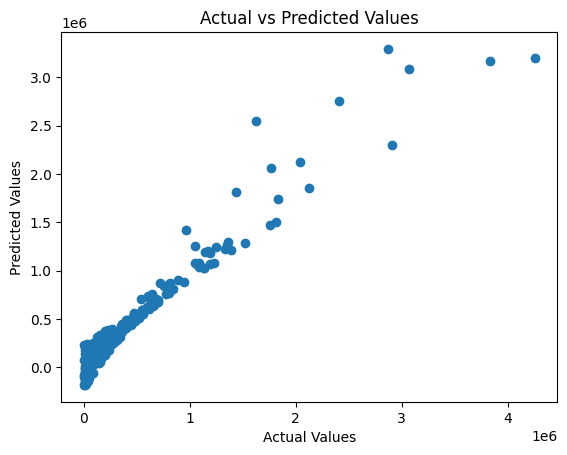

In [ ]:
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()